<h1 style="color: rgb(0, 91, 94);">Fourier Transform</h1>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h2 style="color: rgb(0, 91, 94);">Introduction</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Within this repository, we will be exploring the concept of <b>Fourier Transform</b>, its definition, application and general usefulness. It is important to discuss these in detail to provide a solid understanding of the principles of Fourier Transform.

There are many applications of a Fourier Transform, which we will discuss as well.

<h2 style="color: rgb(0, 91, 94);">Fourier Transform: Definition</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

To give a understanding to what Fourier Transform is, we must first define what exactly a Fourier Transform is. Originally discussed by the French mathmatician <i>Jean Baptiste Fourier</i>, he described the Fourier Transform to be a mathematical procedure which decomposes and transforms functions into frequency components (from a time domain to a frequency domain).<sup><a href="#references">[1]</a></sup>

Fourier Transform is one of two Fourier expansions which fall under the category of Fourier Analysis. We will also talk about the Inverse Fourier Transform, breaking down it's application in both definition and in code.

The Fourier analysis can be described as the study of general functions which may be represented or decomposed into "trigonometric or exponential functions with definite frequencies".<sup><a href="#references">[2]</a></sup>

The usage of Fourier analysis can be used in a myriad of ways, whether developing computer models or processing and analysing data. 

Fourier Transforms are used for <i>non-periodic</i> functions that can be written into trigometric or exponential functions with a "continuum of possible frequencies". Since these functions can be written in sinusoidal functions, this helps to focus on these functions when solving differing equations, which is easier than using general functions.<sup><a href="#references">[1]</a></sup> Essentially this means we can break down waveforms in a different representation of sines and cosines

<h2 style="color: rgb(0, 91, 94);">Fourier Transform: Formula</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

$$
y[k] = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{kn}{N}} x[n]
$$

The following formula is is called <b><i>Fast Fourier Transform (FFT)</i></b>, deriving from discrete fourier transforms. Discrete Fourier Transforms are defined by when a given function and its Fourier transform are replaced with "discretized counterparts" (values which are individual and countable).<sup><a href="#references">[3]</a></sup> The below image gives a visual example of this. The purpose of this is to make computations in a faster manner.

<img src="https://learn.g2.com/hs-fs/hubfs/G2CR_B071_Discrete_vs_Continuous_Data_V1.png?width=866"><a href="https://learn.g2.com/hs-fs/hubfs/G2CR_B071_Discrete_vs_Continuous_Data_V1.png?width=866"><center><b>Source</b></center></a></img>


To attempt to use this formula by hand can be seen from a following example done within the lectures of this module on the topic of Fourier Transform. We can also see the same inputs used within a function from the <i>SciPy Python library</i>, which is mainly used for scientific computing.<sup><a href="#references">[4]</a></sup>

In [14]:
# FAST FOURIER TRANSFORM: BY HAND

# Numerical arrays
import numpy as np

# Sample input array
x = np.array([1.0, 2.0, 3.0, -4.0, 5.5])

# Output array
y = []

N = len(x)

# For each index of the length of the input array
for k in range(N):
    y_k = 0.0
    for n in range(N):
        # Increment the value of y[k]
        y_k = y_k + (np.e**(-2 * np.pi * 1j * k * n / N) * x[n])
    y.append(y_k)

# Output the new output array
np.array(y)

array([ 7.5       +0.j        ,  4.12664445-0.78579896j,
       -5.37664445+8.714644j  , -5.37664445-8.714644j  ,
        4.12664445+0.78579896j])

In [2]:
# FAST FOURIER TRANSFROM: SCIPY LIBRARY


# Import the necessary library
import scipy.fft as fft

y = fft.fft(x)
y

array([ 7.5       -0.j        ,  4.12664445-0.78579896j,
       -5.37664445+8.714644j  , -5.37664445-8.714644j  ,
        4.12664445+0.78579896j])

From the above applications of the fast fourier transform, we can see these long strings of values which end with a $j$. These are known as <b>complex numbers</b>.

<h3 style="color: rgb(0, 91, 94);">Complex Numbers</h3>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />
Complex numbers are used by mathematicians, engineers, and physicists but what exactly is a complex number, and what is its role in Fourier Transforms?

A complex number is comprised of a <b>real number</b> and an <i>imaginary one</i>. <sup><a href="#references">[5]</a></sup>
Since waves consist of both magnitude and phase, complex numbers allow for us to visualize both the magnitude and phase of a wave (meaning complex numbers can be seen as two dimensional values). 

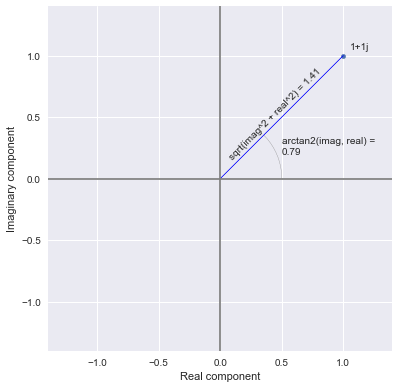

In [18]:
# https://github.com/peterbbryan/Understanding-Fourier/blob/master/fourier_3/medium_graphics/make_graphics_three.py
# Allows us to visualize of both the phase and maginitude represented by a complex number

import matplotlib.pyplot as plt


plt.style.use("seaborn")  # switch to seaborn style


def _figure_1(output_path: str = "./figure_1.png") -> None:
    """
    Plot phase and magnitude.
    Args:
        output_path: Path to write figure to.
    """

    plt.figure()

    # plot a complex number sample
    plt.scatter(1, 1, s=20)
    plt.plot([(0, 0), (1, 1)], linewidth=0.5, color="blue")
    plt.text(1.05, 1.05, "1+1j")

    # plot angle
    theta = np.linspace(0, np.pi / 4, 10)
    x1 = 0.5 * np.cos(theta)
    x2 = 0.5 * np.sin(theta)
    plt.plot(x1, x2, linewidth=0.3, color="gray")
    plt.text(0.5, 0.2, f"arctan2(imag, real) = \n{np.arctan2(1, 1):.2f}")

    # plot distance
    plt.text(
        0.06, 0.16, f"sqrt(imag^2 + real^2) = {np.sqrt(1**2 + 1**2):.2f}", rotation=45
    )

    # rectify the axes
    plt.axhline(y=0, color="gray", linestyle="-")
    plt.axvline(x=0, color="gray", linestyle="-")
    plt.axis("square")
    plt.xlabel("Real component")
    plt.xlim(-1.4, 1.4)
    plt.ylabel("Imaginary component")
    plt.ylim(-1.4, 1.4)

    plt.tight_layout()
    plt.savefig(output_path)

_figure_1()

Essentially, complex numbers allow for us to represent both magnitude and frequency, which can be extracted from them for Fourier Transform.

<h2 style="color: rgb(0, 91, 94);">Fourier Transform: Breaking down a signal</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Let us create a signal by using sine and cosine functions by using examples representing in class.

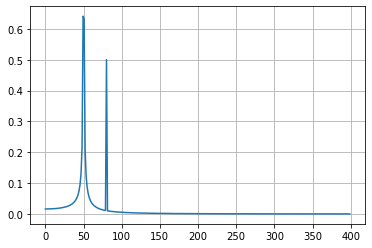

In [3]:
from scipy.fft import fft, fftfreq

import numpy as np

# Number of sample points

N = 600

# sample spacing

T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)

y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = fft(y)

xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.grid()

plt.show()

In [4]:
def add(x,y):
    return (x[0] + y[0],x[1]+y[1])

In [5]:
add(x,y)

(0.0, 0.6778260585113263)

In [6]:
def mul(x,y):
    a, b = x
    c, d = y
    return (a * c - b * d,a * d + b * c)

In [7]:
(3 + 7j) + (-2 + 5j)

(1+12j)

Explore complex numbers (why multiplication is as it is etc.)

In [8]:
class Complex():
    def __init__(self,a,b):
        self.a = a
        self.b = b
        
    def __add__(self, other):
        return Complex(self.a + other.a, self.b + other.b)
    
    def __mul__(self, other):
        a, b = self.a, self.b
        c, d = other.a, other.b
        return Complex(a*c - b*d, a*d + b*c)
    
    def __repr__(self):
        return f'Complex({self.a},{self.b})'

In [9]:
Complex(3,7)

Complex(3,7)

In [10]:
Complex(-2,5)

Complex(-2,5)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
x = np.linspace(-6.0,6.0,1000)
y = x**2 - 16

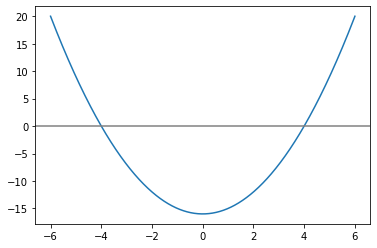

In [13]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.axhline(0.0,color='grey')

<h2 style="color: rgb(0, 91, 94);">References</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<div id="references">
    <p>
        [1] Ijirset (Journal): <a href="http://www.ijirset.com/upload/2018/november/46_Applications%20of%20Fourier%20transform%20in%20Engineering%20Field%20_1_.pdf">Applications of Fourier Transform in Engineering Field</a><br><br>
        [2] Scholars at Harvard (Notes): <a href="https://scholar.harvard.edu/files/david-morin/files/waves_fourier.pdf">Fourier analysis</a><br><br>  
        [3] G2 - Business Software Reviews (Website): <a href="https://www.g2.com/articles/discrete-vs-continuous-data">Discrete vs. Continuous Data</a><br><br>  
        [4] SciPy: Documentation: <a href="https://docs.scipy.org/doc/scipy/tutorial/fft.html">Fourier Transforms</a><br><br> 
        [5] The Fourier Transform (Website): <a href="https://docs.scipy.org/doc/scipy/tutorial/fft.html">Fourier Transforms - Introduction to Complex Math</a><br><br>  
        [5] Towards Data Science (Website): <a href="https://towardsdatascience.com/the-fourier-transform-3-magnitude-and-phase-encoding-in-complex-data-8184e2ef75f0">Magnitude and phase encoding in complex data</a><br><br>  
</div>

<h3 style="color: rgb(0, 91, 94);">Further Study</h3><br>
<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<a href="https://youtu.be/spUNpyF58BY">But what is the Fourier Transform? A visual introduction</a>


<!--<sup><a href="#references">[5]</a></sup>!-->